In [2]:
# Importing Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../Data/AnimeList.csv", index_col = 0)
df.head()

,name,studio,yearReleased,rating
0,100-man no Inochi no Ue ni Ore wa Tatteiru 2nd...,Maho Film,2021,7.12
1,180 Byou de Kimi no Mimi wo Shiawase ni Dekiru...,"EKACHI EPILKA, Indivision",2021,6.17
2,2.43: Seiin Koukou Danshi Volley-bu,David Production,2021,0.00
3,4-nin wa Sorezore Uso wo Tsuku,Studio Flad,2022,6.77
4,5-toubun no Hanayome ∬,Bibury Animation Studios,2021,0.00


In [6]:
df.describe(include = 'all')

,name,studio,yearReleased,rating
count,467,467,467,467.000000
unique,450,166,22,NaN
top,Black Clover,J.C.Staff,2021,NaN
freq,3,16,171,NaN
mean,NaN,NaN,NaN,2.338801
std,NaN,NaN,NaN,3.393290
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,6.420000


In [7]:
# Checking for inconsistencies under the "yearReleased" column.
df['yearReleased'].unique()

array([' 2021', ' 2022', ' 2020', ' 2023', ' Fall 2022', ' 2017',
       ' Censored', ' 2016', ' 5 min. per ep.', ' 1996', ' 2000',
       ' Unknown', ' 2018', ' Summer 2022', ' 2010', ' Spring 2022',
       ' 23 min.', ' TV', ' 15 min.', ' 1999', ' 2019', ' Winter 2022'],
      dtype=object)

In [8]:
# Renaming unproperly scraped entries under "yearReleased" column.

df.loc[df.yearReleased == " Fall 2022"] = "2022"
df.loc[df.yearReleased == " Summer 2022"] = "2022"
df.loc[df.yearReleased == " Winter 2022"] = "2022"
df.loc[df.yearReleased == " Spring 2022"] = "2022"

In [51]:
# Removing unwanted rows under the "yearReleased" column with the inapropriate format.

df = df.drop(df[df.yearReleased == ' Censored'].index)
df = df.drop(df[df.yearReleased == ' 5 min. per ep.'].index)
df = df.drop(df[df.yearReleased == ' Unknown'].index)
df = df.drop(df[df.yearReleased == ' 23 min.'].index)
df = df.drop(df[df.yearReleased == ' TV'].index)
df = df.drop(df[df.yearReleased == ' 15 min.'].index)

# Removing extra spaces
df['yearReleased'] = df['yearReleased'].str.strip()

In [52]:
# Checking.
df['yearReleased'].unique()

array(['2021', '2022', '2020', '2023', '2017', '2016', '1996', '2000',
       '2018', '2010', '1999', '2019'], dtype=object)

In [11]:
# Saving file to csv.
df.to_csv("../Data/AnimeListClened.csv")

In [54]:
df['rating'].unique()

array([   7.12,    6.17,    0.  ,    6.77,    7.01,    7.42,    7.75,
          7.45,    7.19,    7.93,    6.22,    9.06,    6.33, 2022.  ,
          6.46,    7.29,    7.85,    8.29,    5.93,    7.79,    6.31,
          7.16,    5.45,    8.17,    7.25,    5.2 ,    7.2 ,    7.76,
          6.89,    5.32,    8.18,    6.34,    5.73,    6.25,    8.36,
          7.91,    8.3 ,    8.21,    5.54,    6.35,    8.56,    6.81,
          7.46,    6.52,    7.66,    7.5 ,    7.38,    8.  ,    8.62,
          6.26,    7.52,    6.61,    5.67,    7.65,    7.48,    6.23,
          8.28,    7.83,    8.57,    6.88,    6.32,    7.6 ,    6.84,
          7.53,    5.62,    8.68,    5.71,    6.63,    6.58,    7.57,
          5.38,    7.74,    7.82,    7.88,    7.59,    7.69,    7.61,
          6.96,    7.35,    6.59,    7.28,    6.67,    6.54,    8.49,
          6.38,    6.36,    7.05,    5.47,    7.34,    8.22,    4.84,
          8.55,    8.53,    8.63,    7.49,    7.31,    6.69,    5.14,
          6.91,    7

In [76]:
df['rating'] = df['rating'].astype(str)

In [77]:
# Removing extra spaces
df['rating'] = df['rating'].str.strip()
df['name'] = df['name'].str.strip()

In [78]:
df['rating'].unique()

array(['9.06', '8.68', '8.63', '8.62', '8.57', '8.56', '8.55', '8.53',
       '8.49', '8.45', '8.36', '8.3', '8.29', '8.28', '8.22', '8.21',
       '8.2', '8.18', '8.17', '8.05', '8.0', '7.93', '7.91', '7.88',
       '7.85', '7.83', '7.82', '7.8', '7.79', '7.76', '7.75', '7.74',
       '7.69', '7.67', '7.66', '7.65', '7.61', '7.6', '7.59', '7.57',
       '7.53', '7.52', '7.51', '7.5', '7.49', '7.48', '7.46', '7.45',
       '7.42', '7.38', '7.35', '7.34', '7.31', '7.3', '7.29', '7.28',
       '7.25', '7.24', '7.2', '7.19', '7.16', '7.12', '7.05', '7.02',
       '7.01', '6.96', '6.91', '6.89', '6.88', '6.84', '6.81', '6.8',
       '6.77', '6.71', '6.7', '6.69', '6.68', '6.67', '6.63', '6.61',
       '6.59', '6.58', '6.54', '6.52', '6.46', '6.38', '6.36', '6.35',
       '6.34', '6.33', '6.32', '6.31', '6.3', '6.26', '6.25', '6.23',
       '6.22', '6.2', '6.17', '5.93', '5.73', '5.71', '5.67', '5.62',
       '5.54', '5.47', '5.46', '5.45', '5.38', '5.32', '5.2', '5.14',
       '4.84', '0.0

In [79]:
# Removing the row with rating as 2022.0
df = df.drop(df[df.rating == '2022.0'].index)
df['rating'].unique()

array(['9.06', '8.68', '8.63', '8.62', '8.57', '8.56', '8.55', '8.53',
       '8.49', '8.45', '8.36', '8.3', '8.29', '8.28', '8.22', '8.21',
       '8.2', '8.18', '8.17', '8.05', '8.0', '7.93', '7.91', '7.88',
       '7.85', '7.83', '7.82', '7.8', '7.79', '7.76', '7.75', '7.74',
       '7.69', '7.67', '7.66', '7.65', '7.61', '7.6', '7.59', '7.57',
       '7.53', '7.52', '7.51', '7.5', '7.49', '7.48', '7.46', '7.45',
       '7.42', '7.38', '7.35', '7.34', '7.31', '7.3', '7.29', '7.28',
       '7.25', '7.24', '7.2', '7.19', '7.16', '7.12', '7.05', '7.02',
       '7.01', '6.96', '6.91', '6.89', '6.88', '6.84', '6.81', '6.8',
       '6.77', '6.71', '6.7', '6.69', '6.68', '6.67', '6.63', '6.61',
       '6.59', '6.58', '6.54', '6.52', '6.46', '6.38', '6.36', '6.35',
       '6.34', '6.33', '6.32', '6.31', '6.3', '6.26', '6.25', '6.23',
       '6.22', '6.2', '6.17', '5.93', '5.73', '5.71', '5.67', '5.62',
       '5.54', '5.47', '5.46', '5.45', '5.38', '5.32', '5.2', '5.14',
       '4.84', '0.0

In [80]:
# Convert back to number
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

Let's find the top 5 most rated anime.

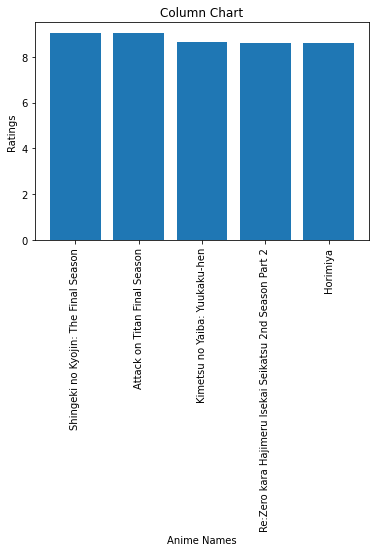

In [82]:
# Sort the dataframe in descending order by the 'y' column
df = df.sort_values('rating', ascending=False)

# Select the top 5 highest values
top_5 = df.head(5)

# Plot the bar graph using the top 5 values
plt.bar(top_5['name'], top_5['rating'])

plt.xlabel('Anime Names')
plt.ylabel('Ratings')
plt.title('Column Chart')

plt.xticks(rotation=90)

# Show the plot
plt.show()

### Conclusion.
It appears that the top rated anime of 2021/2022 goes to **Attack on Titans: The Final Season**.

In [83]:
# Save the dataframe
df.to_csv("../Data/AnimeListCleaned.csv")